In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
msg= pd.read_csv('/content/spam.csv', encoding='latin-1')

msg= msg.drop(labels =['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
msg.columns= ['label', 'text']
labels= np.where(msg['label']=='spam',1,0)
msg.head() 
x_train,x_test, y_train, y_test= train_test_split(msg['text'], labels, test_size=0.2)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Initialize and Fit

In [ ]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(x_train)

In [ ]:
x_train_seq= tokenizer.texts_to_sequences(x_train)
x_test_seq= tokenizer.texts_to_sequences(x_test)

In [ ]:
x_test_seq[0]

[294, 702, 1566, 89, 21, 55]

In [ ]:
x_train_seq_padded= pad_sequences(x_train_seq, 50)
x_test_seq_padded= pad_sequences(x_test_seq, 50)

In [ ]:
x_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   16,   10,   45, 1258,  272], dtype=int32)

Build the Model RNN

In [ ]:
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

Construct model

In [ ]:
model= Sequential()

1st Embedding layer

In [ ]:
model.add(Embedding(len(tokenizer.index_word)+1,  32 ))

2nd LSTM [regularisation using dropout]

In [ ]:
model.add(LSTM(32  , dropout= 0,  recurrent_dropout=0))

3rd Dense with relu function

In [ ]:
model.add(Dense(32, activation='relu'))

4th Dense with Signoid 

In [ ]:
model.add(Dense(1 ,  activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          251680    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 261,089
Trainable params: 261,089
Non-trainable params: 0
_________________________________________________________________


Compile the Model

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

Fit the Model

In [ ]:
history=  model.fit(x_train_seq_padded, y_train,
                    batch_size=32, epochs=10,
                    validation_data=(x_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 8s 35ms/step - loss: 0.2611 - binary_accuracy: 0.9181 - false_negatives: 342.0000 - val_loss: 0.0736 - val_binary_accuracy: 0.9821 - val_false_negatives: 18.0000
Epoch 2/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0301 - binary_accuracy: 0.9926 - false_negatives: 24.0000 - val_loss: 0.0685 - val_binary_accuracy: 0.9857 - val_false_negatives: 16.0000
Epoch 3/10
140/140 [==============================] - 4s 29ms/step - loss: 0.0111 - binary_accuracy: 0.9973 - false_negatives: 11.0000 - val_loss: 0.0746 - val_binary_accuracy: 0.9839 - val_false_negatives: 17.0000
Epoch 4/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0038 - binary_accuracy: 0.9996 - false_negatives: 2.0000 - val_loss: 0.0848 - val_binary_accuracy: 0.9848 - val_false_negatives: 16.0000
Epoch 5/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0019 - binary_accuracy: 0.9998 - false_negatives: 1.0000 - val_

Visualize

In [ ]:
import matplotlib.pyplot as plt
for i in ['binary_accuracy', 'false_negatives']:
  acc= history.history[i]
  val_acc= history.history['val_{}'.format(i)]
  epochs= range(1, len(acc)+1)

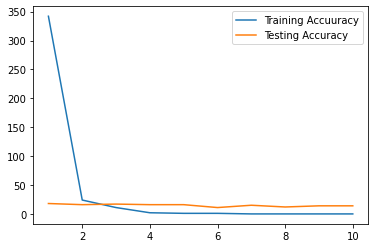

In [ ]:
plt.figure()
plt.plot(epochs, acc, label= 'Training Accuuracy')
plt.plot(epochs, val_acc, label= 'Testing Accuracy')
plt.legend()
plt.show()